# <center><h1> FRUIT DETECTION USING CNN<h1> <center/>

To see a demo of this model checkout https://share.streamlit.io/ujjwal404/fruitdetectiontflite

 To run this notebook upload your `kaggle.json` file on colab and run the cells below- 

In [1]:
# Adding Kaggle.json to access kaggleAPI
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Downloading Fruits-360 dataset from kaggle
! kaggle datasets download moltean/fruits

100% 1.28G/1.28G [00:07<00:00, 174MB/s]
100% 1.28G/1.28G [00:07<00:00, 178MB/s]


In [3]:
# Unzipping the dataset
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [124]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import models, layers  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

In [125]:
os.chdir('/content/fruits-360_dataset/fruits-360')
os.getcwd()

'/content/fruits-360_dataset/fruits-360'

In [128]:
BATCH_SIZE = 32
NUM_CLASSES = 70
EPOCHS = 50
MODEL_NAME = "Fruits_360.h5"
SAVE_PATH = ""

PATH_TRAINING_DATA = 'Training/'
PATH_TEST_DATA = 'Test/'

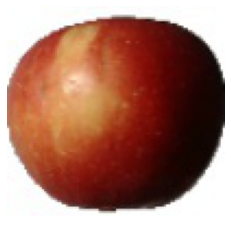

(100, 100, 3)


In [146]:
#Displaying the image
img = load_img(PATH_TRAINING_DATA + "Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

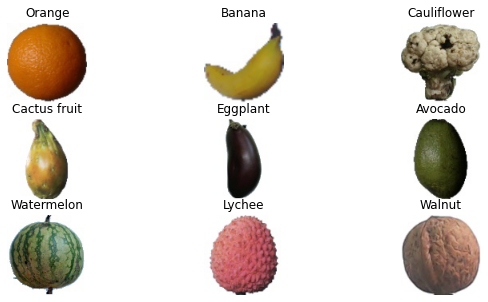

In [147]:
#Visualizing more Images
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(PATH_TRAINING_DATA + images[i] +"/0_100.jpg", target_size=(100,100)))

In [148]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(PATH_TRAINING_DATA):
    for image_filename in os.listdir(PATH_TEST_DATA + i):
        fruits.append(i) 
        fruits_image.append(i + '/' + image_filename)

#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('Grape Blue', 328),
 ('Plum 3', 304),
 ('Walnut', 249),
 ('Cherry 2', 246),
 ('Cherry Rainier', 246),
 ('Strawberry Wedge', 246),
 ('Tomato 3', 246),
 ('Peach 2', 246),
 ('Melon Piel de Sapo', 246),
 ('Tomato 1', 246)]

In [149]:
#Finding number of classes
className = glob(PATH_TRAINING_DATA + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [150]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

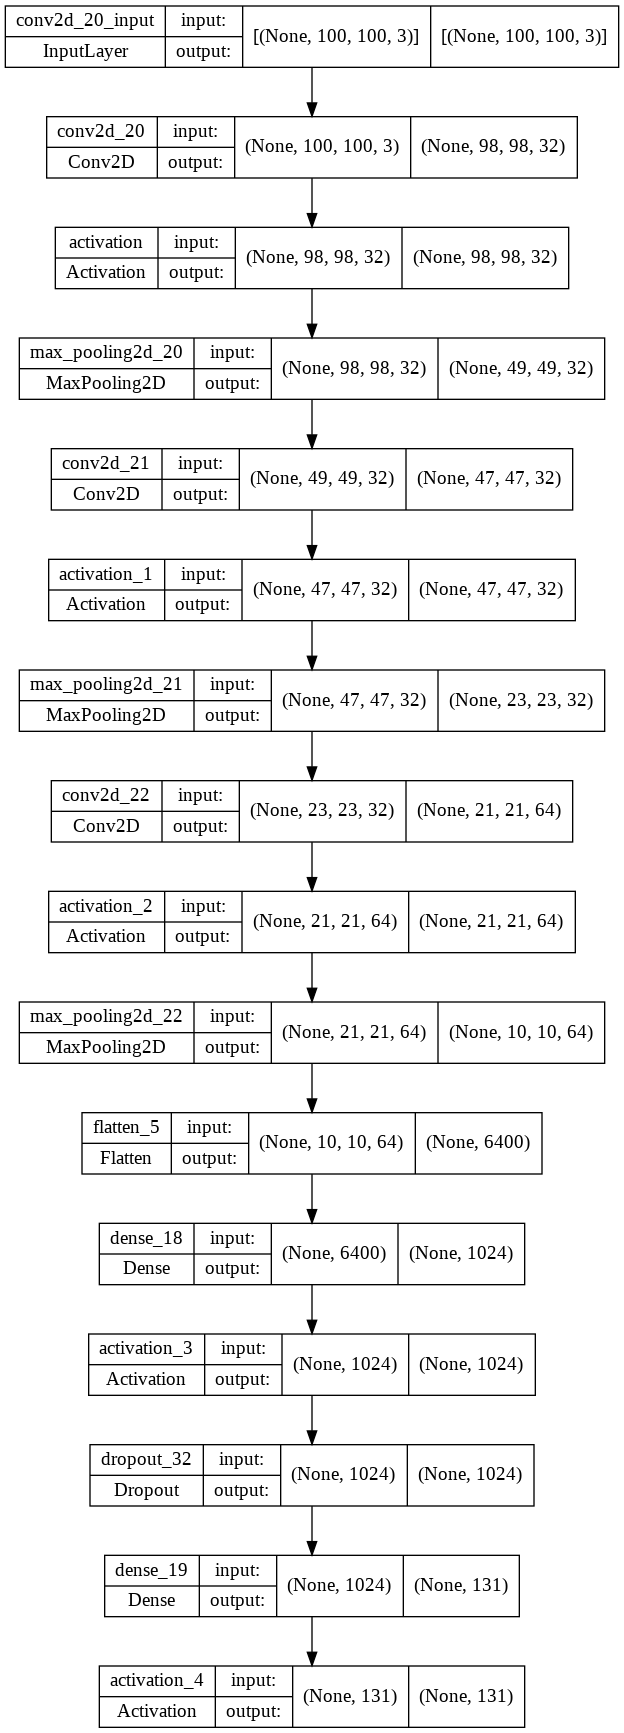

In [151]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [152]:
# Compiling the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [187]:
#Getting model's summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                 

In [153]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [154]:
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = PATH_TRAINING_DATA,
target_size= (100, 100),
batch_size = BATCH_SIZE,
color_mode= "rgb",
class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
directory = PATH_TEST_DATA,
target_size= (100, 100),
batch_size = BATCH_SIZE,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [155]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // BATCH_SIZE,
epochs=EPOCHS,
validation_data = test_generator,
validation_steps = 800 // BATCH_SIZE)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


50/50 [==============================] - 30s 588ms/step - loss: 4.6547 - accuracy: 0.0375 - val_loss: 4.2145 - val_accuracy: 0.0550
Epoch 2/50
50/50 [==============================] - 34s 686ms/step - loss: 3.7401 - accuracy: 0.1156 - val_loss: 2.9696 - val_accuracy: 0.2275
Epoch 3/50
50/50 [==============================] - 29s 570ms/step - loss: 2.9204 - accuracy: 0.2206 - val_loss: 2.1919 - val_accuracy: 0.4375
Epoch 4/50
50/50 [==============================] - 31s 615ms/step - loss: 2.2555 - accuracy: 0.3587 - val_loss: 1.5237 - val_accuracy: 0.5863
Epoch 5/50
50/50 [==============================] - 36s 715ms/step - loss: 1.8302 - accuracy: 0.4638 - val_loss: 1.2707 - val_accuracy: 0.6225
Epoch 6/50
50/50 [==============================] - 28s 569ms/step - loss: 1.5613 - accuracy: 0.5269 - val_loss: 1.0756 - val_accuracy: 0.7125
Epoch 7/50
50/50 [==============================] - 28s 569ms/step - loss: 1.3231 - accuracy: 0.6019 - val_loss: 0.9798 - val_accuracy: 0.7038
Epoch 8/50

## Validation Loss

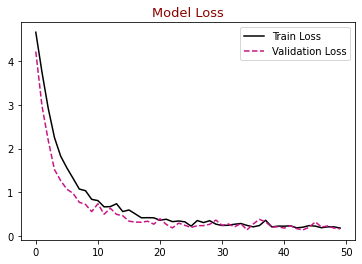

In [156]:
#Plotting train & validation loss
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

## Validation Accuracy

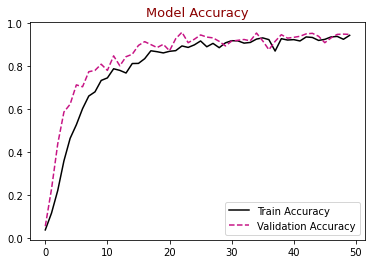

In [157]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

##Predicting Image

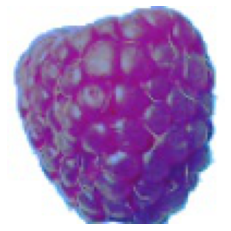

In [161]:
#Displaying the selected image
img = load_img(PATH_TEST_DATA + "/Raspberry/77_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('./Test/Raspberry/77_100.jpg')

In [162]:

#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

[113]


In [183]:
#Printing class dictionary
# print(test_generator.class_indices)
label = list(list(test_generator.class_indices.keys()))
label[prediction[0]]

'Raspberry'

## Saving Model

In [184]:
model.save(filepath="save_model/") 

INFO:tensorflow:Assets written to: save_model/assets


In [185]:
model.save(MODEL_NAME) 

## Converting our model to TensorflowLite

In [186]:
converter = tf.lite.TFLiteConverter.from_saved_model('save_model')
tflite_model = converter.convert()
open("fruits.tflite", "wb").write(tflite_model)

26873920

---